<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/CommunitiesMDSshortest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, first, we'll generate a matrix M that represents the shortest-path distances between nodes in the Zachary's karate club network using NetworkX. Then, we'll apply Multidimensional Scaling (MDS) to generate a matrix X of positions from the distance matrix M. Note that for the MDS part, we'll use the sklearn.manifold.MDS module.

First, ensure you have NetworkX installed in your Python environment. If not, you can install it using pip:

In [1]:
pip install networkx

Here's how you can load the Zachary's karate club network and calculate the shortest-path distance matrix:

In [2]:
import networkx as nx
import numpy as np

# Load Zachary's karate club network
G = nx.karate_club_graph()

# Calculate the shortest-path distance matrix
length = dict(nx.all_pairs_shortest_path_length(G))
N = len(G.nodes())
M = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        M[i, j] = length[i][j]

print(M)

[[0. 1. 1. ... 1. 2. 2.]
 [1. 0. 1. ... 2. 2. 2.]
 [1. 1. 0. ... 2. 1. 2.]
 ...
 [1. 2. 2. ... 0. 1. 1.]
 [2. 2. 1. ... 1. 0. 1.]
 [2. 2. 2. ... 1. 1. 0.]]


For this part, ensure you have scikit-learn installed. If not, you can install it using pip:

In [3]:
pip install scikit-learn

Now, apply Multidimensional Scaling (MDS) to the distance matrix M to generate a matrix of positions X:

In [4]:
from sklearn.manifold import MDS

# Initialize MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress='auto')

# Apply MDS to the distance matrix M to get the 2D positions matrix X
X = mds.fit_transform(M)

print(X)

[[-0.40194964 -0.9118373 ]
 [-1.04712368 -0.34275059]
 [ 0.0164895  -0.09522484]
 [-0.07767798 -0.85421326]
 [-0.15876015 -2.00887212]
 [-0.92454855 -1.93470442]
 [-0.2593209  -2.13575664]
 [-0.79781719 -0.71294827]
 [-0.40941366  0.41244168]
 [-0.62180473  1.24790122]
 [-0.70536607 -1.90360604]
 [-2.06515109 -0.80695738]
 [ 0.51100316 -1.95501971]
 [-0.2445434  -0.07426852]
 [ 0.89355429  1.98698147]
 [-0.13018889  2.12907829]
 [-1.01994666 -3.08967144]
 [-1.77570683 -0.96934839]
 [ 1.52409684  1.53934401]
 [-0.96168319  0.31047306]
 [-0.53597391  2.11834436]
 [-1.54000085 -1.31087062]
 [ 1.21574692  1.75207498]
 [ 1.72226075  1.01716177]
 [ 1.92721348 -0.64903505]
 [ 2.05148467 -0.40250007]
 [ 0.34776869  2.3190946 ]
 [ 1.28806652  0.29422509]
 [ 0.86715297  0.3713628 ]
 [ 0.59579171  1.89820367]
 [-0.86739846  0.96077138]
 [ 0.75794509 -0.27119224]
 [ 0.49693929  0.99900004]
 [ 0.32886196  1.07231847]]


This code will output a 2D positions matrix X where each row represents the 2D coordinates of a node in the network. The n_components=2 parameter specifies that we want to reduce the dimensions to 2, which is typical for visualization purposes. The dissimilarity='precomputed' parameter is used because we are providing a precomputed distance matrix.

Finally, we'll visualize the network in a two-dimensional space using the positions obtained from MDS.

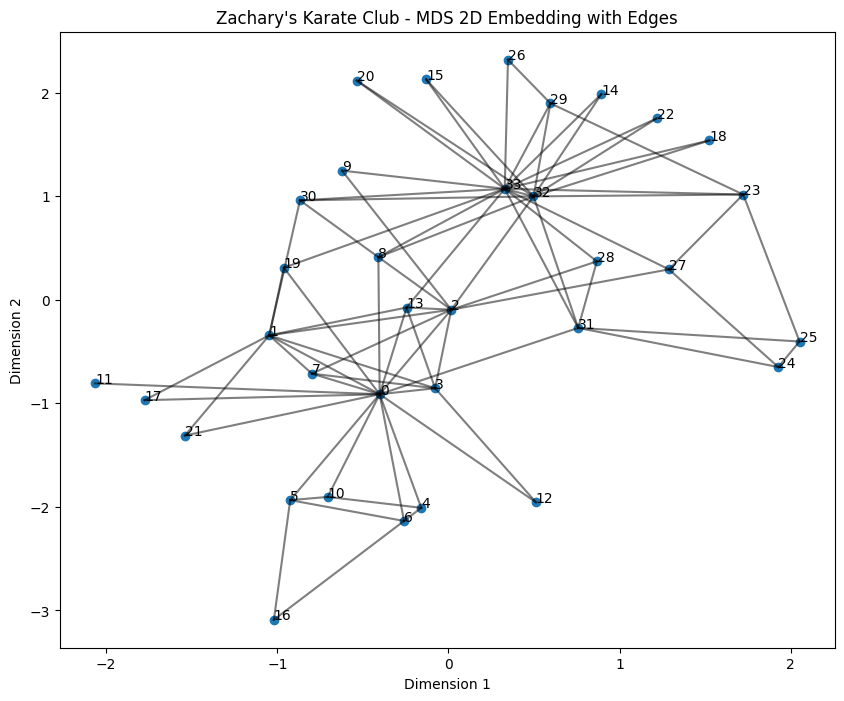

In [5]:
import matplotlib.pyplot as plt

# Plot the graph with edges
plt.figure(figsize=(10, 8))

# Plot the edges
for edge in G.edges():
    start_pos, end_pos = X[edge[0]], X[edge[1]]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-', alpha=0.5)

# Plot the nodes
plt.scatter(X[:, 0], X[:, 1])

# Label the points with their corresponding node numbers
for i, txt in enumerate(G.nodes()):
    plt.annotate(txt, (X[i, 0], X[i, 1]))

plt.title("Zachary's Karate Club - MDS 2D Embedding with Edges")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

To group the nodes into classes based on their locations defined by the matrix X obtained from Multidimensional Scaling (MDS), we can use the K-means clustering algorithm. K-means will partition the nodes into k clusters where each node belongs to the cluster with the nearest mean location. The number of clusters k is a parameter that you need to specify. For the sake of demonstration, let's assume we want to divide the nodes into two clusters (which might represent two communities within the Zachary's Karate Club network).

Here's how you can perform K-means clustering on the nodes based on their 2D locations from X:

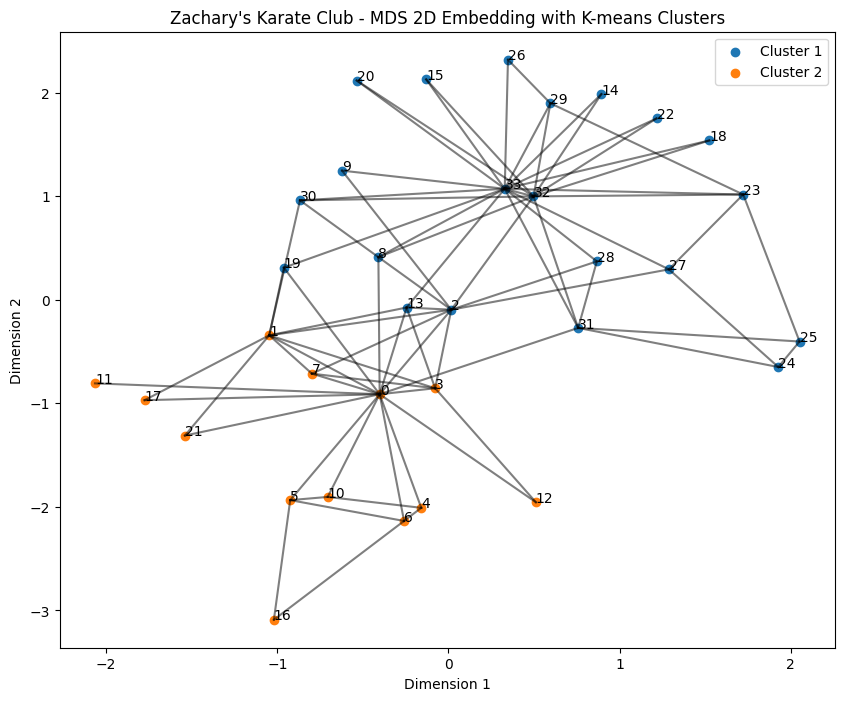

In [6]:
from sklearn.cluster import KMeans

# Number of clusters
k = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Plot the clustered graph
plt.figure(figsize=(10, 8))

# Plot the edges first to keep them in the background
for edge in G.edges():
    start_pos, end_pos = X[edge[0]], X[edge[1]]
    plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-', alpha=0.5)

# Plot the nodes, colored by their cluster membership
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i+1}')

# Label the points with their corresponding node numbers
for i, txt in enumerate(G.nodes()):
    plt.annotate(txt, (X[i, 0], X[i, 1]))

plt.title("Zachary's Karate Club - MDS 2D Embedding with K-means Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In what follows, we are going to:
1. Compute a matrix X_3 using Multidimensional Scaling (MDS) to get coordinates in a 3D space.
2. Run K-means clustering with k=4 on the 3D coordinates.
3. Visualize the graph in a 3D plot using the locations in the X_3 matrix and color the nodes based on their cluster membership as determined by K-means.

Recompute Matrix X_3 in 3D:

In [7]:
# Apply Multidimensional Scaling (MDS) with 3 components for 3D space
mds_3d = MDS(n_components=3, dissimilarity="precomputed", random_state=42, normalized_stress='auto')
X_3 = mds_3d.fit_transform(M)

Run K-means with k=4:

In [8]:
# Specify the number of clusters
k = 4

# Perform K-means clustering on the 3D positions
kmeans_3d = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_3d = kmeans_3d.fit_predict(X_3)

3D Plot of the Graph:

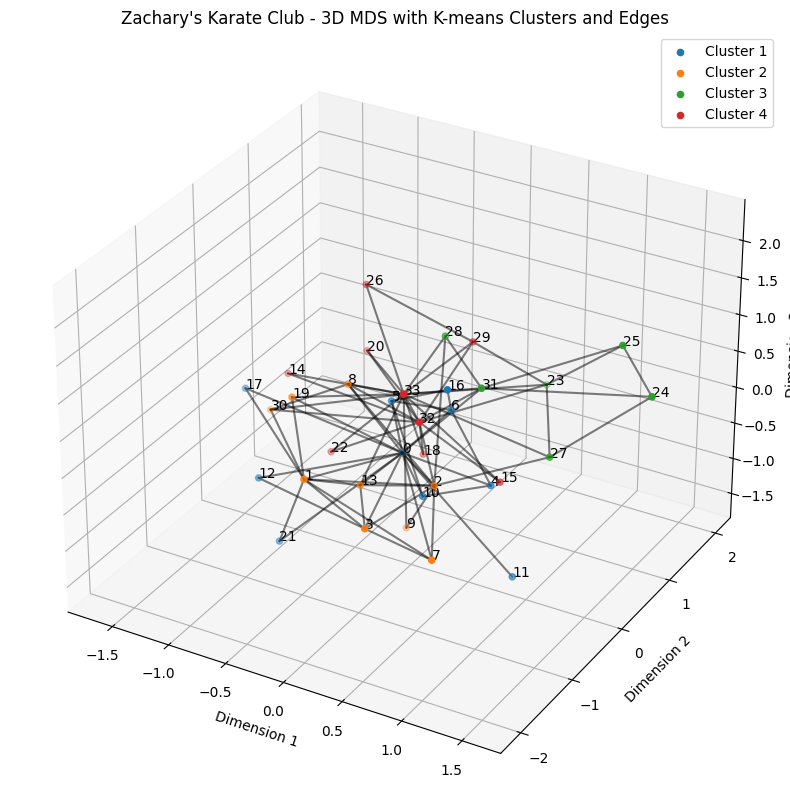

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot edges
for edge in G.edges():
    start_pos, end_pos = X_3[edge[0]], X_3[edge[1]]
    ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], [start_pos[2], end_pos[2]], 'k-', alpha=0.5)

# Plot the nodes with colors based on their cluster
for i in range(k):
    # Extract the indices of nodes in this cluster
    indices = [index for index, cluster_id in enumerate(clusters_3d) if cluster_id == i]
    # Extract the positions of these nodes
    cluster_positions = X_3[indices, :]
    ax.scatter(cluster_positions[:, 0], cluster_positions[:, 1], cluster_positions[:, 2], label=f'Cluster {i+1}')

# Annotate the nodes with their labels
for i, txt in enumerate(G.nodes()):
    ax.text(X_3[i, 0], X_3[i, 1], X_3[i, 2], '%s' % (txt), size=10, zorder=1)

ax.set_title("Zachary's Karate Club - 3D MDS with K-means Clusters and Edges")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.legend()

plt.show()

What is the right number of communities? We can evaluate the modularity function for several community assignments when k=2,3,4, as follows:

In [10]:
# Function to perform K-means, create a proper partition, and calculate modularity
def kmeans_and_modularity(n_clusters, positions, graph):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(positions)
    # Group nodes by their cluster labels to form communities
    communities = [set() for _ in range(n_clusters)]
    for node, label in enumerate(labels):
        communities[label].add(node)
    # Calculate modularity
    modularity = nx.algorithms.community.modularity(graph, communities)
    return modularity

# Ensure X_3 is your 3D MDS positions array
# X_3 = ...

# Calculate modularities for 2, 3, and 4 clusters
modularity_2 = kmeans_and_modularity(2, X_3, G)
modularity_3 = kmeans_and_modularity(3, X_3, G)
modularity_4 = kmeans_and_modularity(4, X_3, G)

print(f"Modularity with 2 communities: {modularity_2}")
print(f"Modularity with 3 communities: {modularity_3}")
print(f"Modularity with 4 communities: {modularity_4}")

Modularity with 2 communities: 0.2903525046382188
Modularity with 3 communities: 0.33253687149791045
Modularity with 4 communities: 0.39269316542043814


Project: Find the optimal number of communities by adapting the dimension of the embedding and the number of communities until you find the number of communities that maximize the modularity function...